Kelompok:

> 
Husain Abidin Widayat
> 
Zaenul Muntaha
> 
Willman Satria Situmorang
> 
Cindy Amelia Putri
> 
Muhammad Rafly 
Chairullah 



In [ ]:
# menginport library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# membuat input dan output dari data dummy
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# mendefinisikan modelnya dengan 2 layer 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)), #layer input, memiliki 4 neuron untuk menerima data input XOR gate dengan aktivasi sigmoid
    tf.keras.layers.Dense(1, activation='sigmoid') #layer output, memiliki 1 neuron dengan aktivasi function sigmoid, untuk menghasilkan output dari data input
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 12        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
# optimizer SGD (Stochastic Gradient Descent) dengan learning rate sebesar 0.1.
# Menggunakan fungsi loss Mean Squared Error (MSE).
# Menggunakan metrik accuracy.

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

# Train the model
history = model.fit(inputs, expected_output, epochs=10000, verbose=0)



In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(inputs, expected_output, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)


Loss: 0.007165629882365465
Accuracy: 1.0


In [ ]:
# Predict outputnya apakah sesuai dengan inputnya tidak
predictions = model.predict(inputs)
print("Predictions:")
for i in range(len(inputs)):
    print(inputs[i], "->", np.round(predictions[i]))

1/1 [==============================] - 0s 59ms/step
Predictions:
[0 0] -> [0.]
[0 1] -> [1.]
[1 0] -> [1.]
[1 1] -> [0.]


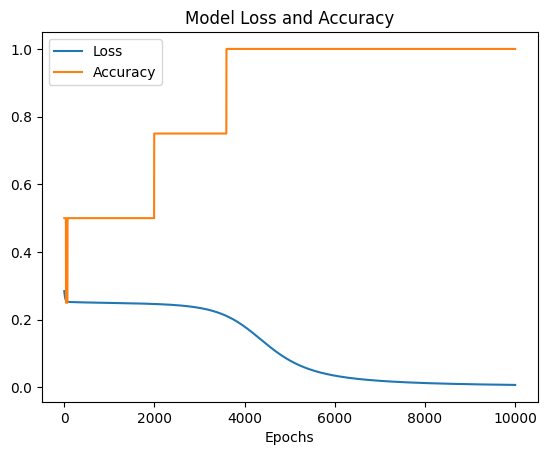

In [ ]:
# Visualisasi loss dan akurasi selama 10000 epochs
visual = range(1, len(history.history['loss']) + 1)

plt.plot(visual, history.history['loss'], label='Loss')
plt.plot(visual, history.history['accuracy'], label='Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()